# Long-term Economic Growth Tool
This notebook is intended as a tool to search the **Madison Project** dataset in Python. 

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

## Data loading - Github Repository

[QuantEcon](https://quantecon.org/) uploaded Madison data from Historical GDP values in their GitHub Repository. Hence, below we call this data from GitHub as an Excel file.

In [2]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head() #Query the top 5 values from the data table

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


Data from [Madison's project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/) is available for **Gross Domestic Product (GDP) per Capita** and **Population** in a cross-sectional panel of country-years. Please take into account that this data is inferred from a plea of historical sources, much of them not very reliable, especially from values from centuries ago in which national accounting wasn't set as a common policy for states.

## Data transformation - Panel

In [14]:
# Let's define countries as a unique list from the Excel column of countries
countries = data.country.unique()
# Now we can check the available data for each country in terms of years
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head() #Query the top 5 values from the country_years table

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


In [45]:
# Below is an ad-hoc search function for any country that you may be interested in. Just change the name of the country in the function.
country_years.filter(like='Colombia', axis=0)

,min_year,max_year
country,,
Colombia,1800,2018


In [11]:
#We should create an index for operating with panel data functions
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

In [13]:
#Now we can, for example, create a data table only for GDP pc as country code, country name, and GDPpc value.
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')
gdp_pc.tail() #query the bottom 5 values from gdp_pc table

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


In [53]:
#Below is an ad-hoc search function for any country you may be interested in. For example, I filtered a few countries from Western Europe.
gdp_pc.filter(items=['ESP', 'FRA', 'PRT', 'ITA'])

,ESP,FRA,PRT,ITA
year,,,,
1,886.0000,956.0000,956.0000,1407.0000
730,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN
...,...,...,...,...
2014,30819.0000,36527.0000,24423.0000,32829.0000
2015,31847.0000,36827.0000,24915.0000,33118.0000
2016,30110.0000,37124.0000,25346.0000,33419.0000


## Data plotting

In [54]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

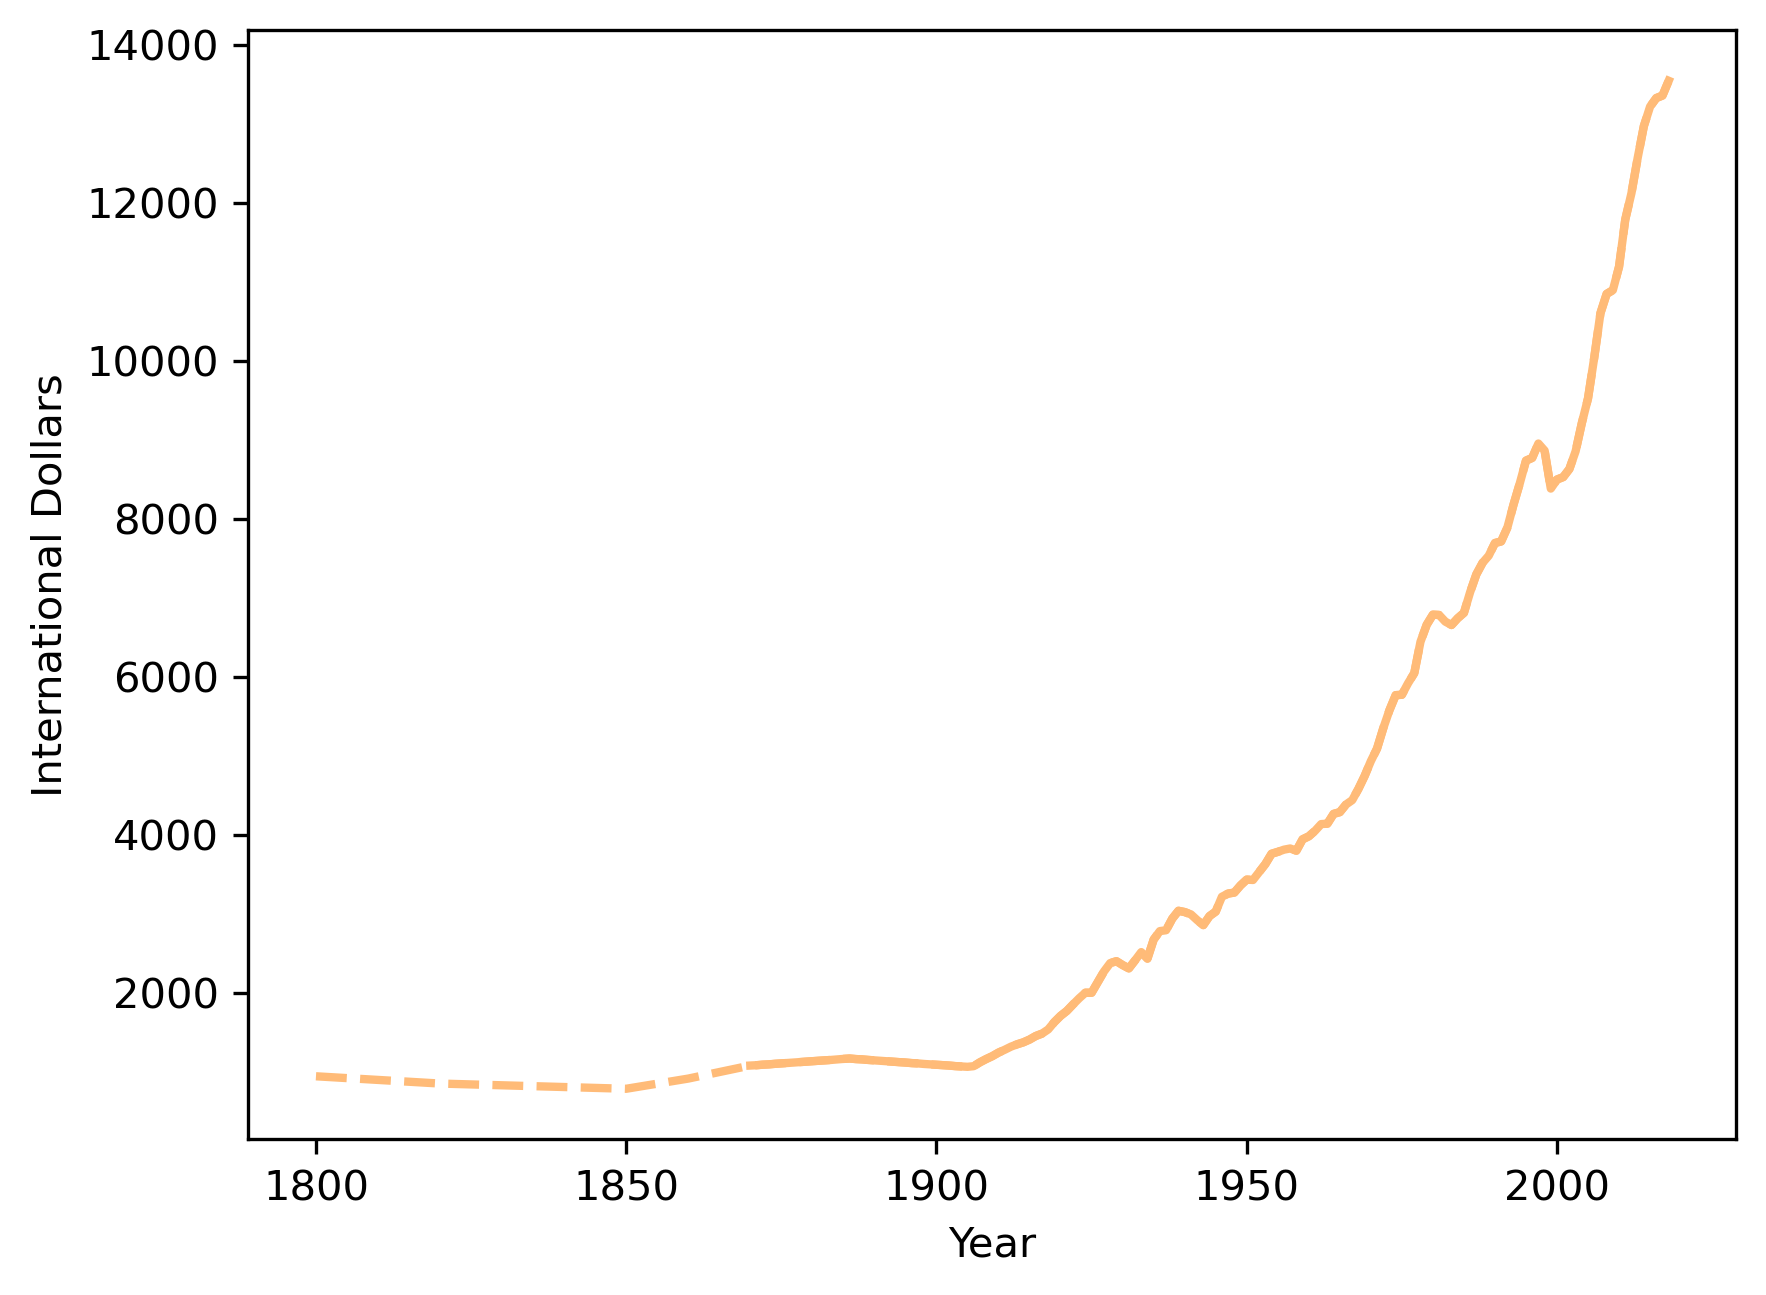

In [62]:

fig, ax = plt.subplots(dpi=300)
country = 'COL'
ax.plot(gdp_pc[country].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[country])

ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])
ax.set_ylabel('International Dollars')
ax.set_xlabel('Year')
plt.show()

In [64]:
def draw_interp_plots(series,        # pandas series
                      country,       # list of country codes
                      ylabel,        # label for y-axis
                      xlabel,        # label for x-axis
                      color_mapping, # code-color mapping
                      code_to_name,  # code-name mapping
                      lw,            # line width
                      logscale,      # log scale for y-axis
                      ax             # matplolib axis
                     ):

    for c in country:
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

Let's plot the parallel evolution of the GDP per capita of Spain, Colombia, and Mexico. Moreover, we create a list of major historical events that impact economic performance. 

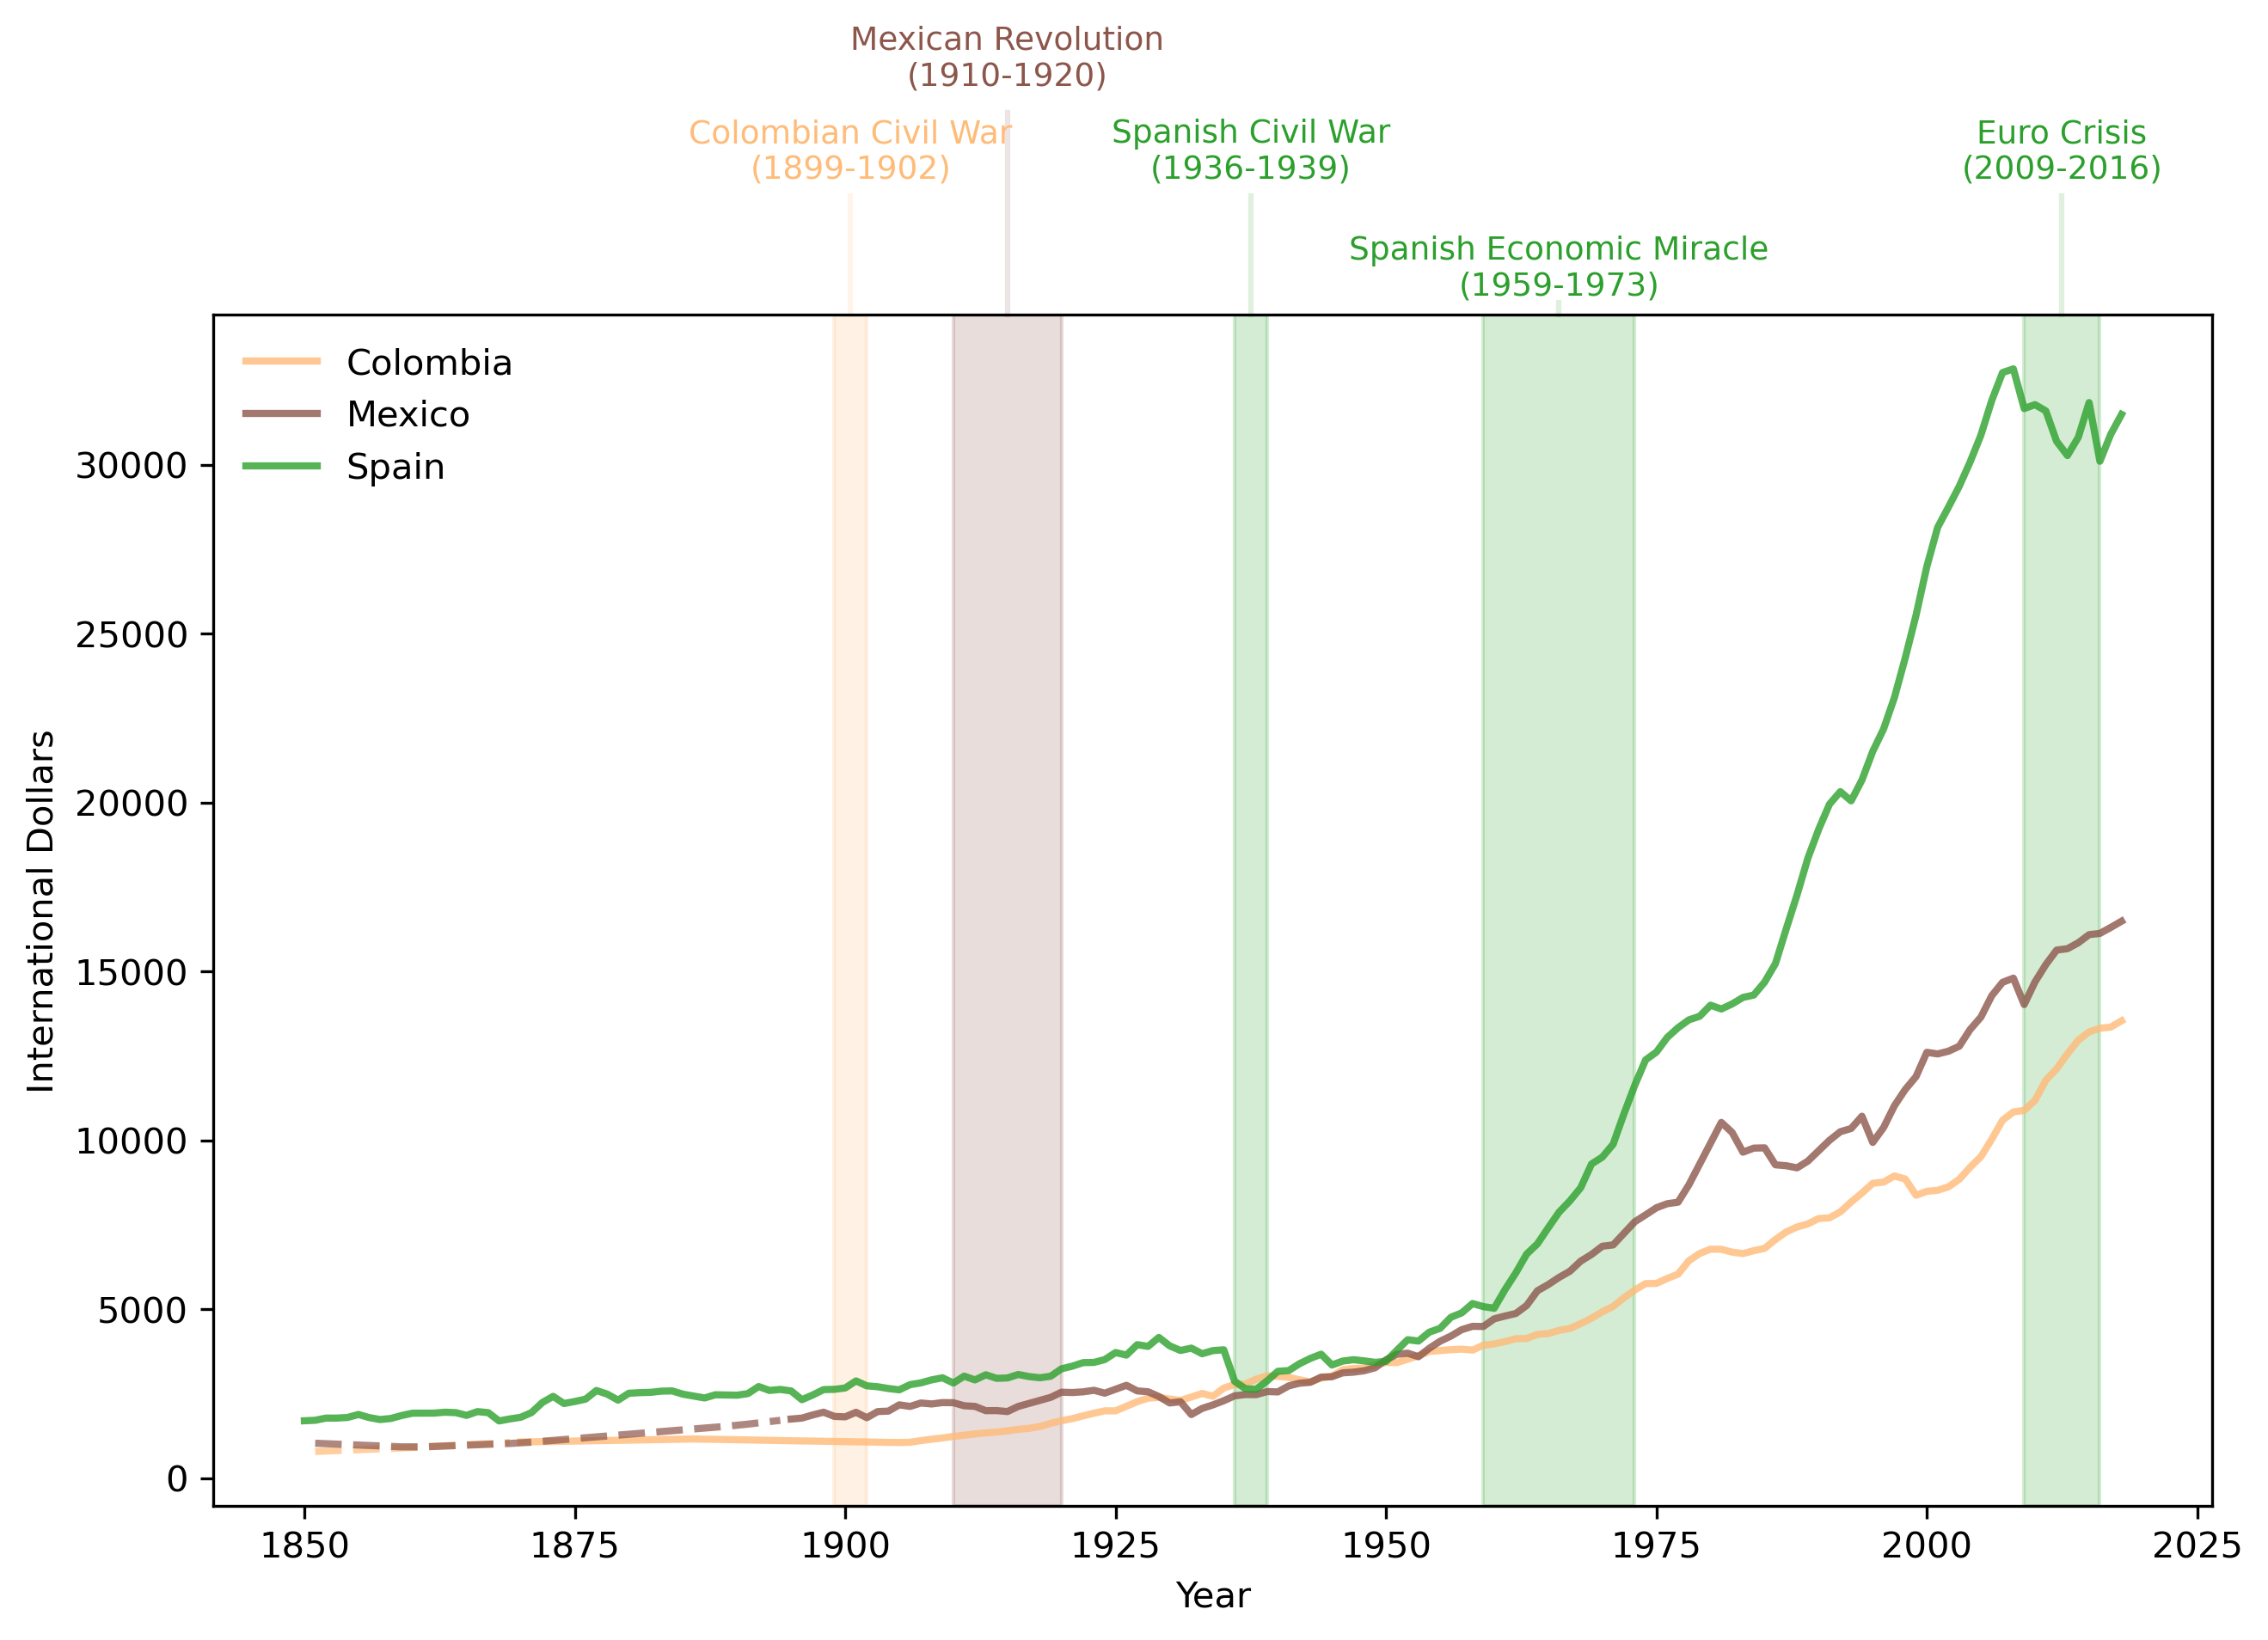

In [92]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['COL', 'MEX', 'ESP']
draw_interp_plots(gdp_pc[country].loc[1850:], 
                  country,
                  'International Dollars','Year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1899, 1902), ylim + ylim*0.14, 
          'Colombian Civil War\n(1899-1902)', 
          color_mapping['COL'], 1.1),
    Event((1910, 1920), ylim + ylim*0.22, 
          'Mexican Revolution\n(1910-1920)', 
          color_mapping['MEX'], 1.17),
    Event((1936, 1939), ylim + ylim*0.14, 
          'Spanish Civil War\n(1936-1939)', 
          color_mapping['ESP'], 1.1),
    Event((1959, 1973), ylim + ylim*0.04, 
          'Spanish Economic Miracle\n(1959-1973)', 
          color_mapping['ESP'], 1.01),
    Event((2009, 2016), ylim + ylim*0.14, 
          'Euro Crisis\n(2009-2016)', 
          color_mapping['ESP'], 1.1),
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

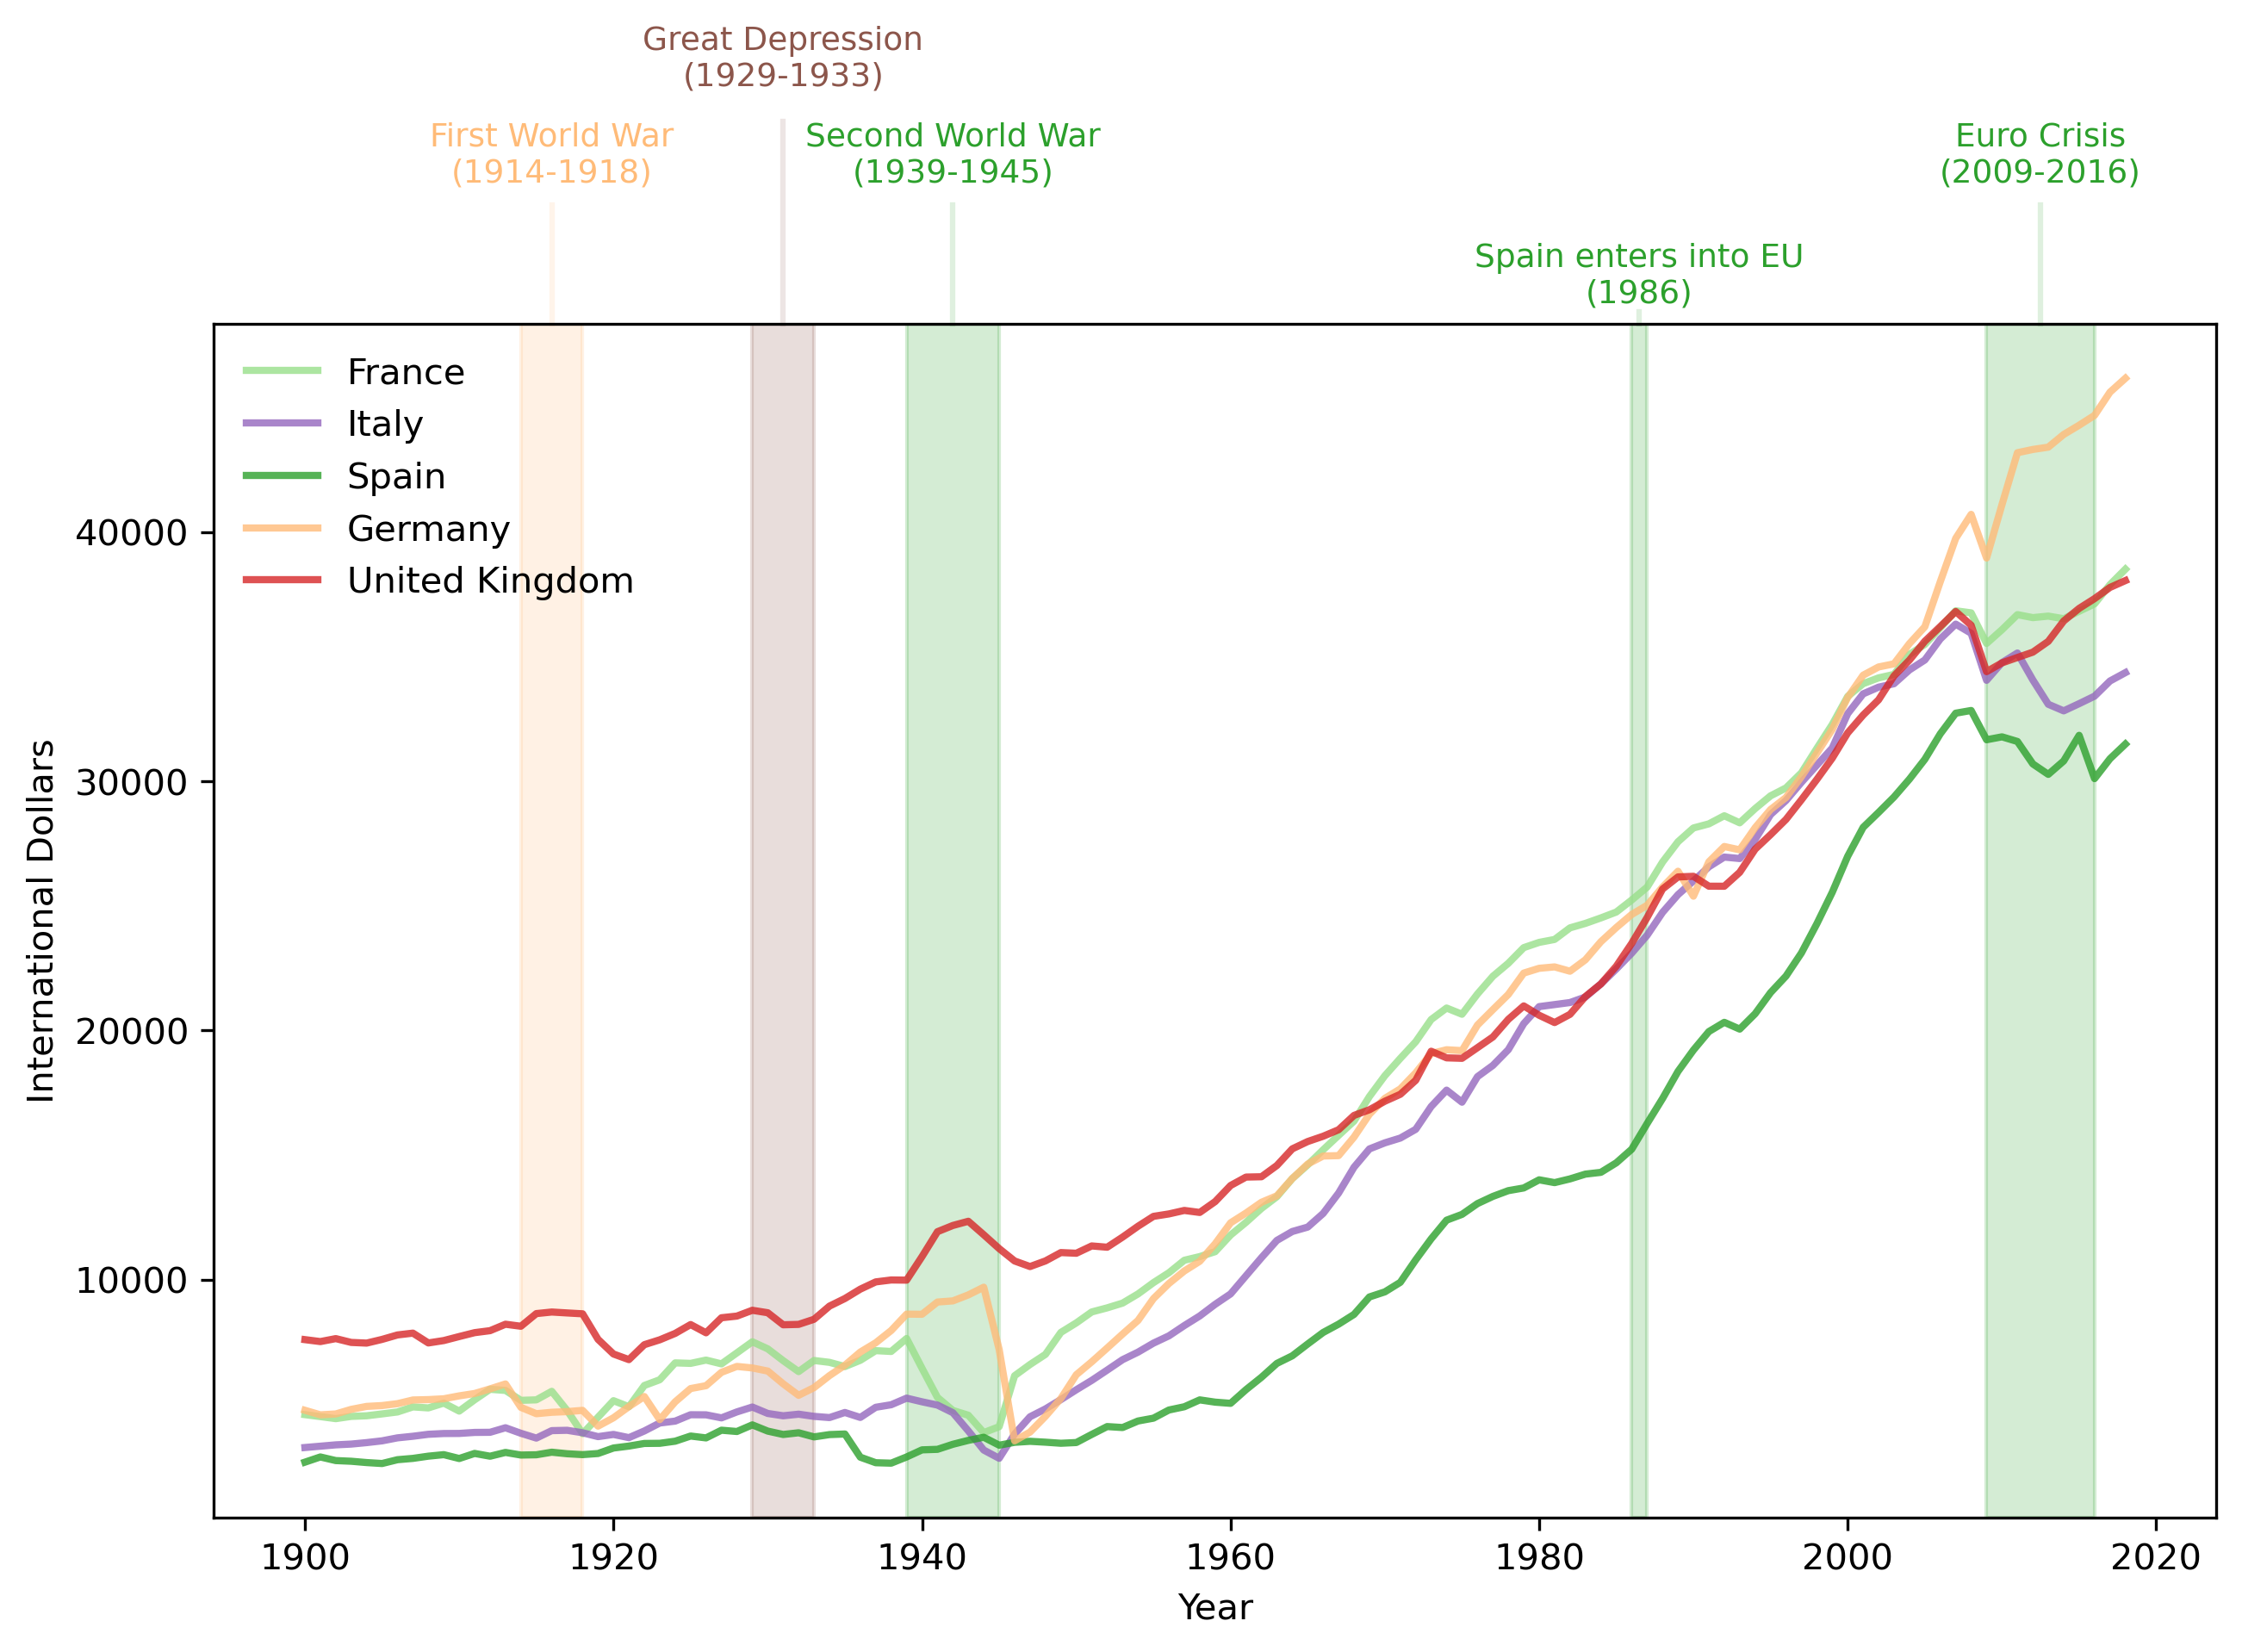

In [97]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['FRA', 'ITA', 'ESP', 'DEU', 'GBR']
draw_interp_plots(gdp_pc[country].loc[1900:], 
                  country,
                  'International Dollars','Year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1914, 1918), ylim + ylim*0.14, 
          'First World War\n(1914-1918)', 
          color_mapping['COL'], 1.1),
    Event((1929, 1933), ylim + ylim*0.22, 
          'Great Depression\n(1929-1933)', 
          color_mapping['MEX'], 1.17),
    Event((1939, 1945), ylim + ylim*0.14, 
          'Second World War\n(1939-1945)', 
          color_mapping['ESP'], 1.1),
    Event((1986, 1987), ylim + ylim*0.04, 
          'Spain enters into EU\n(1986)', 
          color_mapping['ESP'], 1.01),
    Event((2009, 2016), ylim + ylim*0.14, 
          'Euro Crisis\n(2009-2016)', 
          color_mapping['ESP'], 1.1),
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()